In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'C:\Users\Admin\Documents\Career Foundry\Achievement 6\Data'
df = pd.read_csv(os.path.join(path,'pip_dataset.csv'))

In [3]:
matplotlib.__version__

'3.9.2'

In [4]:
df.head()

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,national,consumption,2011,1996.0,0.0,0.920669,11.174149,44.618417,...,8.85,10.92,0.270103,0.119104,0.241293,0.928335,3.945872,3.568627,1.889273,1.888889
1,Albania,2002,national,consumption,2011,2002.0,1.0,1.570843,14.132118,49.669635,...,8.83,11.58,0.317390,0.164812,0.268982,1.215056,4.831625,3.979381,2.090253,1.903780
2,Albania,2005,national,consumption,2011,2005.0,1.0,0.860527,8.715685,38.545254,...,10.02,12.78,0.305957,0.154413,0.254529,1.142718,4.662236,3.872727,1.978328,1.957576
3,Albania,2008,national,consumption,2011,2008.0,1.0,0.313650,5.250542,31.110345,...,10.74,13.62,0.299847,0.148893,0.247311,1.114657,4.395911,3.574803,1.956897,1.826772
4,Albania,2012,national,consumption,2011,2012.0,1.0,0.849754,6.182414,34.528906,...,10.52,13.26,0.289605,0.138417,0.249988,1.041193,4.272573,3.632877,1.941435,1.871233


In [5]:
df.dtypes

country             object
year                 int64
reporting_level     object
welfare_type        object
ppp_version          int64
                    ...   
palma_ratio        float64
s80_s20_ratio      float64
p90_p10_ratio      float64
p90_p50_ratio      float64
p50_p10_ratio      float64
Length: 108, dtype: object

# Exploring relationships

In [6]:
selected_df = df[[
    'gini',
    'headcount_ratio_international_povline',
    'headcount_ratio_upper_mid_income_povline',
    'poverty_gap_index_international_povline',
    'polarization',
    'mld',
    'palma_ratio',
    'mean',
    'median',
    'decile10_share',
    'decile1_share'
]].copy()

# Calculate the decile ratio
selected_df['decile_ratio'] = selected_df['decile10_share'] / selected_df['decile1_share']

# Drop the individual decile share columns since we've calculated our ratio
selected_df = selected_df.drop(['decile10_share', 'decile1_share'], axis=1)

# Rename columns to be more concise for the correlation matrix
selected_df = selected_df.rename(columns={
    'headcount_ratio_international_povline': 'extreme_poverty_rate',
    'headcount_ratio_upper_mid_income_povline': 'middle_poverty_rate',
    'poverty_gap_index_international_povline': 'poverty_gap'
})

In [7]:
# Create a correlation matrix using pandas
selected_df.corr()

,gini,extreme_poverty_rate,middle_poverty_rate,poverty_gap,polarization,mld,palma_ratio,mean,median,decile_ratio
gini,1.000000,0.267382,0.332521,0.314116,0.974043,0.978383,0.943354,-0.339903,-0.412117,0.325013
extreme_poverty_rate,0.267382,1.000000,0.802105,0.957786,0.241352,0.248439,0.269745,-0.491144,-0.482861,0.082397
middle_poverty_rate,0.332521,0.802105,1.000000,0.684975,0.300976,0.280068,0.303915,-0.755296,-0.750111,0.078719
poverty_gap,0.314116,0.957786,0.684975,1.000000,0.295990,0.312101,0.330820,-0.414916,-0.409392,0.131533
polarization,0.974043,0.241352,0.300976,0.295990,1.000000,0.970255,0.952262,-0.321971,-0.392151,0.348091
mld,0.978383,0.248439,0.280068,0.312101,0.970255,1.000000,0.982119,-0.283270,-0.352487,0.370467
palma_ratio,0.943354,0.269745,0.303915,0.330820,0.952262,0.982119,1.000000,-0.299153,-0.363419,0.400536
mean,-0.339903,-0.491144,-0.755296,-0.414916,-0.321971,-0.283270,-0.299153,1.000000,0.994068,-0.083608
median,-0.412117,-0.482861,-0.750111,-0.409392,-0.392151,-0.352487,-0.363419,0.994068,1.000000,-0.104526
decile_ratio,0.325013,0.082397,0.078719,0.131533,0.348091,0.370467,0.400536,-0.083608,-0.104526,1.000000


# Correlation Matrix

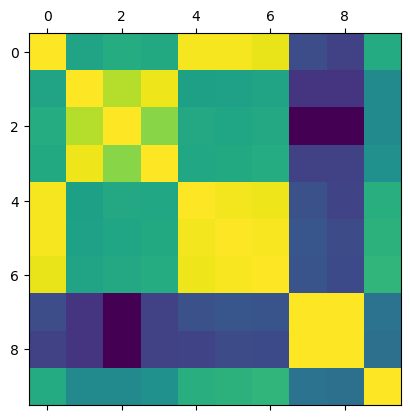

In [8]:
# Create a correlation heatmap using matplotlib
plt.matshow(selected_df.corr())
plt.show()

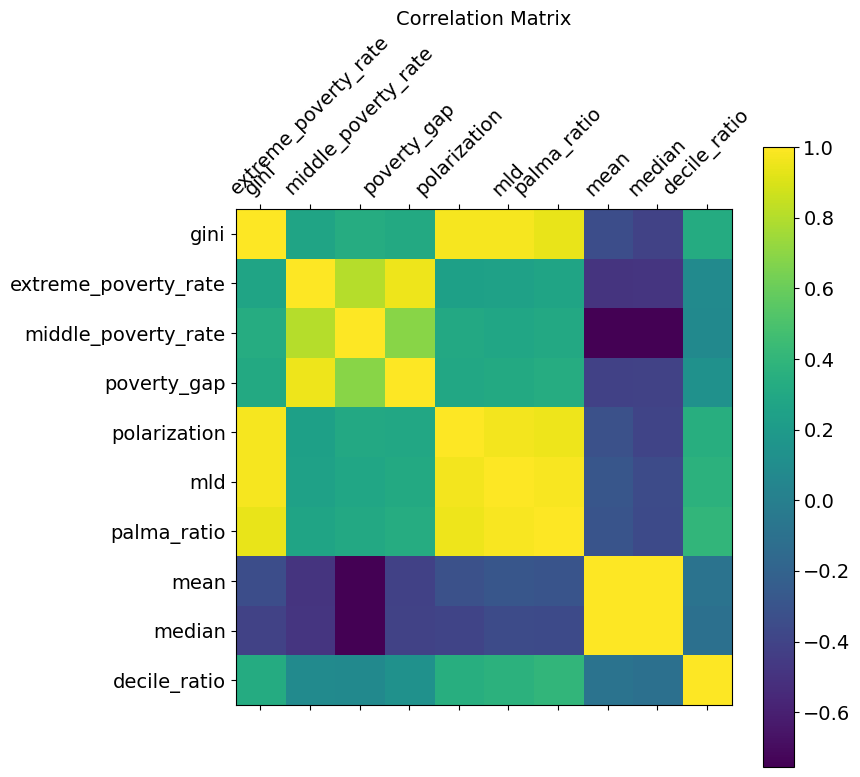

In [9]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(selected_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(selected_df.shape[1]), selected_df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(selected_df.shape[1]), selected_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
f.figure.savefig(os.path.join(path, 'Images', 'correlation_matrix.png'))

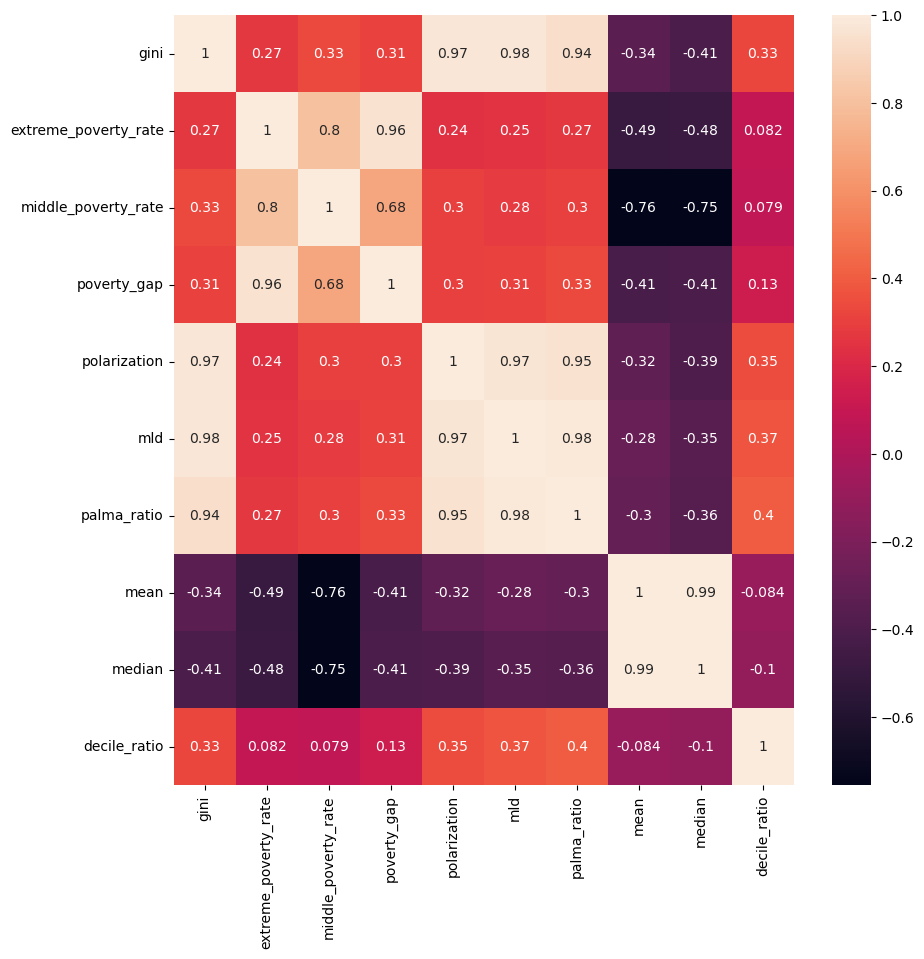

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(selected_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
f.figure.savefig(os.path.join(path, 'Images', 'correlation_heatmap.png'))

# Scatterplots

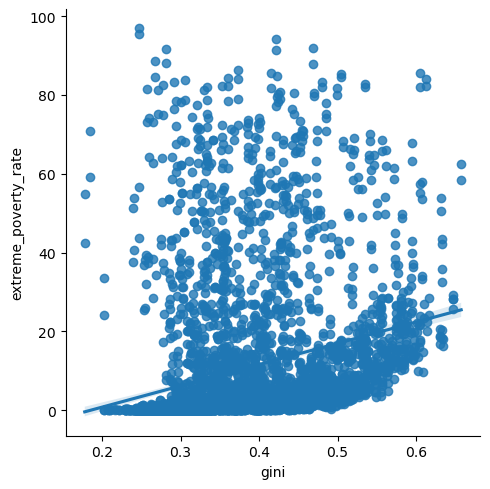

In [11]:
# Create a scatterplot for the "gini" and "extreme_poverty_rate" columns in seaborn
f = sns.lmplot(x = 'gini', y = 'extreme_poverty_rate', data = selected_df)
f.figure.savefig(os.path.join(path, 'Images', 'scatterplot.png'))

# Pair Plot

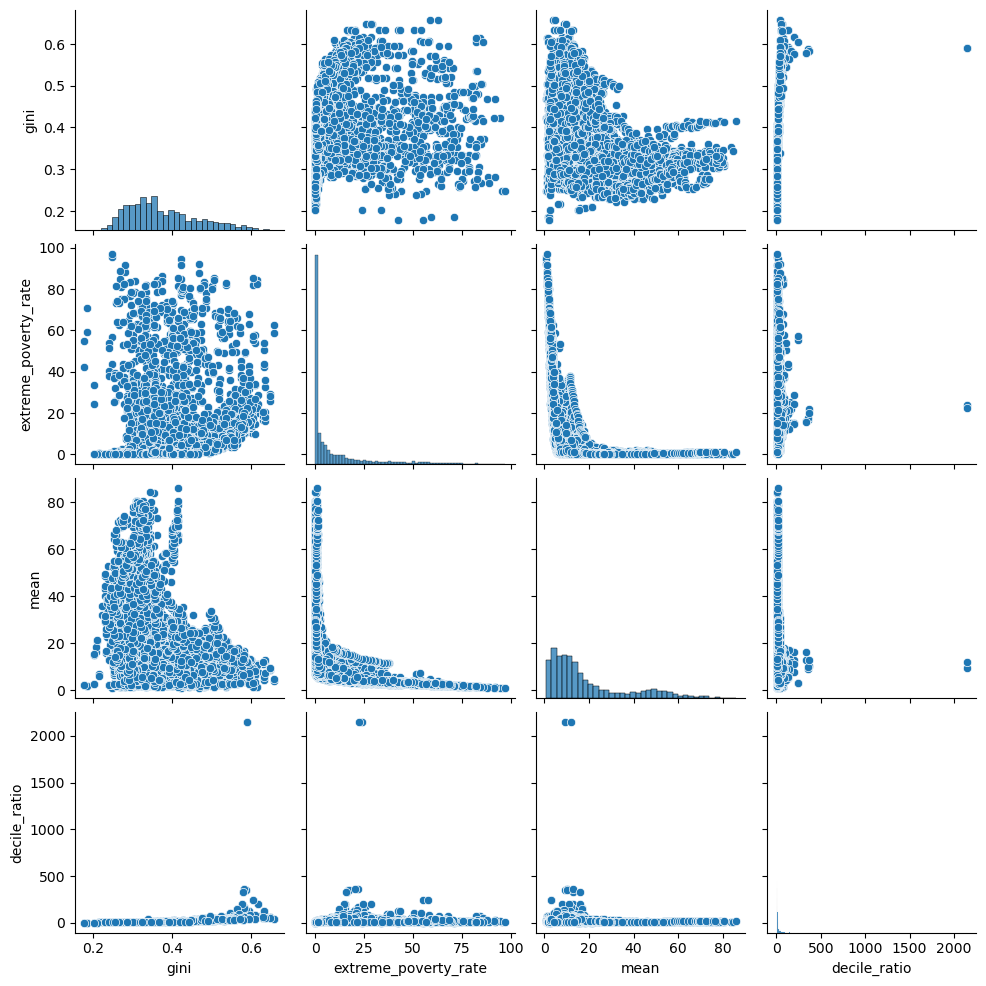

In [12]:
# Creating a pair plot
my_variables = selected_df[['gini', 'extreme_poverty_rate', 'mean', 'decile_ratio']]
pair_plot = sns.pairplot(my_variables)
pair_plot.figure.savefig(os.path.join(path, 'Images', 'pair_plot.png'))

# Categorical Plot

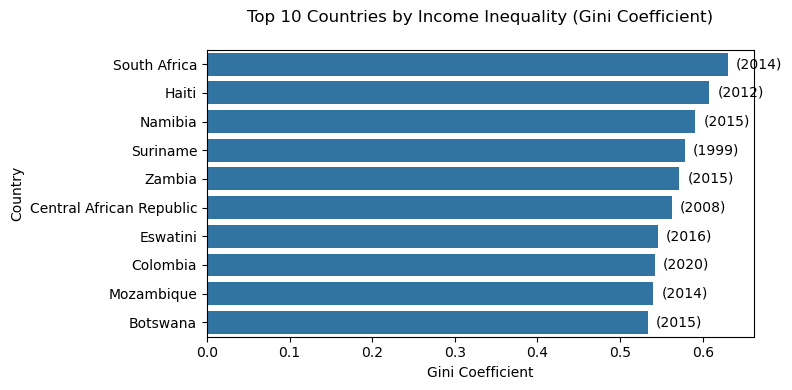

In [13]:
# Get most recent Gini coefficient for each country
latest_gini = (df.sort_values('year')
               .groupby('country')
               .agg({'gini': 'last', 'year': 'last'})
               .reset_index()
               .sort_values('gini', ascending=False)
               .head(10))  # Keep only top 10

# Create the plot with larger figure size for readability
plt.figure(figsize=(8, 4))  

# Create horizontal bar chart
f = sns.barplot(data=latest_gini, y='country', x='gini')

# Customize the plot
plt.title('Top 10 Countries by Income Inequality (Gini Coefficient)', pad=20)
plt.xlabel('Gini Coefficient')
plt.ylabel('Country')

# You might want to add the year to each bar
for i, row in enumerate(latest_gini.itertuples()):
    plt.text(row.gini + 0.01, i, f'({row.year})', va='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()
f.figure.savefig(os.path.join(path, 'Images', 'gini_bar_chart.png'))

In [14]:
#export selected data frame
selected_df.to_csv(os.path.join(path,'Data','selected_data.csv'))